
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению
    
Автор материала: Мария Мансурова, аналитик-разработчик в команде Яндекс.Метрики. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 9. (демо)
## <center> Анализ временных рядов
    


In [65]:
import os

import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater

init_notebook_mode(connected=True)


def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

5.18.0


## Подготавливаем данные

Для начала скачаем данные в `dataframe`. Сегодня будем предсказывать просмотры wiki-страницы [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning). Данные я скачала с помощью библиотеки [Wikipediatrend](https://www.r-bloggers.com/using-wikipediatrend/) для `R`.

In [66]:
df = pd.read_csv("wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [67]:
df.shape

(383, 7)

In [68]:
df.date = pd.to_datetime(df.date)

In [69]:
plotly_df(df.set_index("date")[["count"]])

## Предсказание с помощью Facebook Prophet

Для начала построим предсказание с помощью простой библиотеки `Facebook Prophet`. Для того, чтобы посмотреть на качество модели, отбросим из обучающей выборки последние 30 дней.

In [70]:
import prophet

In [71]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
train_df = df[:-predictions].copy()

12:08:19 - cmdstanpy - INFO - Chain [1] start processing
12:08:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\zvina\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\zvina\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Figure(1000x600)


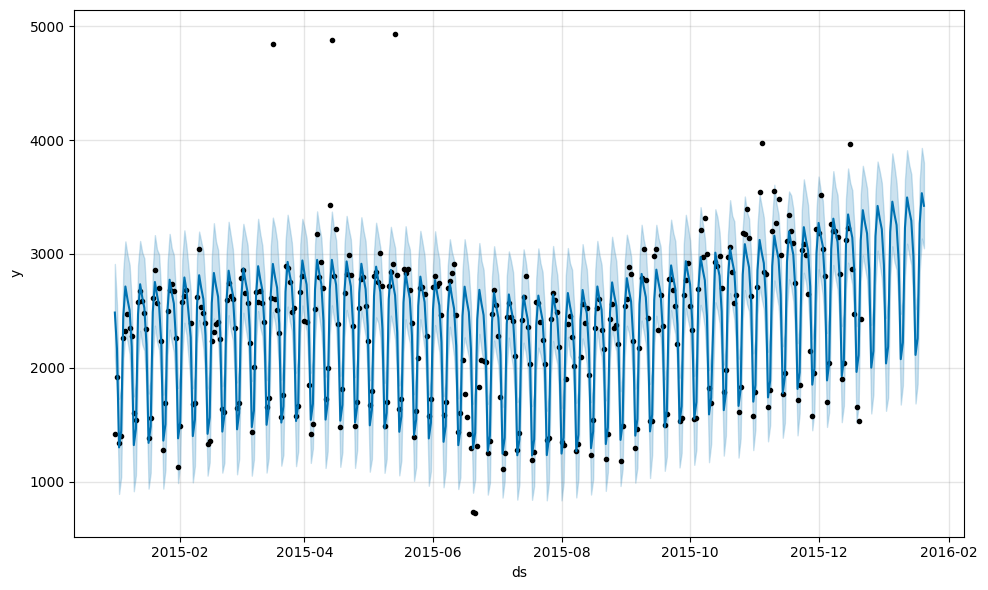

In [72]:
model = prophet.Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=predictions)
new_df = model.predict(future)
print(model.plot(new_df))
# new_df
# plotly_df(new_df.set_index("ds")[["yhat"]])
# model.predict()

**Вопрос 1:** Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

Оценим качество предсказания по последним 30 точкам.

In [73]:
round(new_df[new_df.ds.dt.strftime('%m.%d') == '01.20']['yhat'])

19     2753.0
382    3422.0
Name: yhat, dtype: float64

In [74]:
new_df['error'] = df['y'] - new_df['yhat']
new_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,error
0,2015-01-01,2157.330780,2105.479731,2911.704209,2157.330780,2157.330780,327.383743,327.383743,327.383743,327.383743,327.383743,327.383743,0.0,0.0,0.0,2484.714523,NaN
1,2015-01-02,2160.161581,1769.238514,2552.461107,2160.161581,2160.161581,7.025891,7.025891,7.025891,7.025891,7.025891,7.025891,0.0,0.0,0.0,2167.187471,535.812529
2,2015-01-03,2162.992382,891.435082,1727.723698,2162.992382,2162.992382,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,1300.446418,482.553582
3,2015-01-04,2165.823182,1039.912903,1821.161311,2165.823182,2165.823182,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,1444.297443,1450.702557
4,2015-01-05,2168.653983,2069.156379,2855.868567,2168.653983,2168.653983,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,2450.029837,534.970163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2016-01-16,2975.100998,1686.073585,2516.393940,2953.497262,2995.682977,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,2112.555034,1206.444966
379,2016-01-17,2980.432400,1856.370790,2656.789191,2957.652444,3002.722663,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,2258.906661,824.093339
380,2016-01-18,2985.763803,2845.711410,3647.399310,2961.821720,3009.721128,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,3267.139657,-1394.139657
381,2016-01-19,2991.095205,3134.458837,3930.793916,2966.014891,3016.973882,542.213022,542.213022,542.213022,542.213022,542.213022,542.213022,0.0,0.0,0.0,3533.308227,-1697.308227


**Вопрос 2**: Какое получилось MAPE?

**Вопрос 3**: Какое получилось MAE?

## Предсказываем с помощью ARIMA

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

**Вопрос 4:** Проверим стационарность ряда с помощью критерия Дики-Фулера. Является ли ряд стационарным? Какое значение p-value?

In [ ]:
## ВАШ КОД для проверки стационарности ряда ##

**Вопрос 5**: Далее перейдем к построению модели SARIMAX (`sm.tsa.statespace.SARIMAX`). Модель c какими параметрами лучшая по `AIC`-критерию?

In [ ]:
## ВАШ КОД для построения модели ##